# Using NLP on Educational Reform Policies to Predict Educational Outcome
### Preprocessing and EDA

Import Statements

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [22]:
# Settings and Style

pd.set_option('display.max_columns', None) 
sns.set(style="whitegrid")

Load Dataset

In [23]:
# Load WERD Dataset
werd_df = pd.read_csv('../Data/World Education Reform Database/werd_v2_translated.csv')

In [24]:
werd_df.head()

,reform_id,country_code,country_name,reporting_entity,year,reform_title,reform_description,reform_description_translated
0,9,AFG,Afghanistan,Afghanistan,1904.0,Establishment of modern education system,Since the establishment of the modern educatio...,Since the establishment of the modern educatio...
1,10,AFG,Afghanistan,Afghanistan,1973.0,Structure of general education changed,After the creation of the Republic of Afghanis...,After the creation of the Republic of Afghanis...
2,5,AFG,Afghanistan,Afghanistan,1978.0,Multi-language textbooks,"After the events of 1978, school textbooks and...","After the events of 1978, school textbooks and..."
3,3,AFG,Afghanistan,Afghanistan,1979.0,Structure of general education changed,"In 1979, the pattern became 4:3:3.","In 1979, the pattern became 4:3:3."
4,11,AFG,Afghanistan,Afghanistan,1980.0,Expansion of teacher training schools,Given that the training of qualified teachers ...,Given that the training of qualified teachers ...


In [25]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10955 entries, 0 to 10954
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reform_id                      10955 non-null  int64  
 1   country_code                   10880 non-null  object 
 2   country_name                   10955 non-null  object 
 3   reporting_entity               10955 non-null  object 
 4   year                           10237 non-null  float64
 5   reform_title                   10954 non-null  object 
 6   reform_description             10955 non-null  object 
 7   reform_description_translated  10955 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 684.8+ KB


In [26]:
werd_df.isnull().sum()

reform_id                          0
country_code                      75
country_name                       0
reporting_entity                   0
year                             718
reform_title                       1
reform_description                 0
reform_description_translated      0
dtype: int64

In [27]:
# Load PISA Dataset
pisa_df = pd.read_csv('..\Data\PISA Scores\PISA_Scores_2000_2022.csv')

In [28]:
pisa_df.head()

,no,country_name,2000_Reading,2000_Mathematics,2000_Science,2003_Reading,2003_Mathematics,2003_Science,2006_Reading,2006_Mathematics,2006_Science,2009_Reading,2009_Mathematics,2009_Science,2012_Reading,2012_Mathematics,2012_Science,2015_Reading,2015_Mathematics,2015_Science,2018_Reading,2018_Mathematics,2018_Science,2022_Reading,2022_Mathematics,2022_Science
0,1,Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526.0,562.0,542.0,542.0,573.0,551.0,535.0,564.0,556.0,549.0,569.0,551.0,543.0,575.0,561.0
1,2,Japan,522.0,557.0,550.0,498.0,534.0,548.0,498.0,523.0,531.0,520.0,529.0,539.0,538.0,536.0,547.0,516.0,532.0,538.0,504.0,527.0,529.0,516.0,536.0,547.0
2,3,Macao (China),NaN,NaN,NaN,NaN,527.0,525.0,492.0,525.0,511.0,487.0,525.0,511.0,509.0,538.0,521.0,509.0,544.0,529.0,525.0,558.0,544.0,510.0,552.0,543.0
3,4,Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,496.0,549.0,532.0,495.0,543.0,520.0,523.0,560.0,523.0,497.0,542.0,532.0,503.0,531.0,516.0,515.0,547.0,537.0
4,5,Korea,525.0,547.0,552.0,534.0,542.0,538.0,556.0,547.0,522.0,539.0,546.0,538.0,536.0,554.0,538.0,517.0,524.0,516.0,514.0,526.0,519.0,527.0,527.0,528.0


In [29]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                95 non-null     int64  
 1   country_name      95 non-null     object 
 2   2000_Reading      39 non-null     float64
 3   2000_Mathematics  40 non-null     float64
 4   2000_Science      41 non-null     float64
 5   2003_Reading      38 non-null     float64
 6   2003_Mathematics  39 non-null     float64
 7   2003_Science      38 non-null     float64
 8   2006_Reading      56 non-null     float64
 9   2006_Mathematics  57 non-null     float64
 10  2006_Science      57 non-null     float64
 11  2009_Reading      73 non-null     float64
 12  2009_Mathematics  73 non-null     float64
 13  2009_Science      73 non-null     float64
 14  2012_Reading      65 non-null     float64
 15  2012_Mathematics  65 non-null     float64
 16  2012_Science      65 non-null     float64
 17 

In [30]:
pisa_df.describe()

,no,2000_Reading,2000_Mathematics,2000_Science,2003_Reading,2003_Mathematics,2003_Science,2006_Reading,2006_Mathematics,2006_Science,2009_Reading,2009_Mathematics,2009_Science,2012_Reading,2012_Mathematics,2012_Science,2015_Reading,2015_Mathematics,2015_Science,2018_Reading,2018_Mathematics,2018_Science,2022_Reading,2022_Mathematics,2022_Science
count,95.000000,39.000000,40.00000,41.000000,38.000000,39.000000,38.000000,56.000000,57.000000,57.000000,73.000000,73.000000,73.000000,65.000000,65.000000,65.000000,70.000000,70.000000,70.000000,78.000000,78.000000,78.000000,81.000000,81.000000,81.000000
mean,48.000000,473.512821,470.25000,474.243902,481.131579,485.615385,488.078947,459.517857,469.017544,473.140351,457.109589,459.958904,464.452055,473.984615,473.338462,478.569231,461.557143,461.614286,467.685714,453.384615,458.628205,457.935897,435.382716,437.444444,446.839506
std,27.568098,54.571475,64.90812,53.022533,41.327415,52.800825,42.797058,57.837387,59.274932,54.581014,53.868812,61.144055,57.700385,47.095811,55.494165,50.684678,51.092311,55.121024,52.308600,52.837470,56.390823,51.888327,56.055233,58.482476,55.774873
min,1.000000,327.000000,292.00000,333.000000,375.000000,356.000000,385.000000,285.000000,311.000000,322.000000,314.000000,331.000000,330.000000,384.000000,368.000000,373.000000,347.000000,328.000000,332.000000,340.000000,325.000000,336.000000,329.000000,336.000000,347.000000
25%,24.500000,446.500000,432.75000,443.000000,473.000000,467.000000,481.500000,412.250000,424.000000,428.000000,414.000000,409.000000,416.000000,441.000000,432.000000,439.000000,427.000000,417.250000,425.000000,412.250000,417.250000,417.500000,386.000000,389.000000,403.000000
50%,48.000000,492.000000,489.00000,487.000000,491.500000,503.000000,495.000000,479.000000,490.000000,489.000000,474.000000,477.000000,486.000000,488.000000,484.000000,494.000000,481.500000,478.500000,476.000000,468.000000,468.000000,468.000000,438.000000,441.000000,447.000000
75%,71.500000,511.500000,517.75000,512.000000,507.000000,523.500000,517.500000,498.250000,513.000000,513.000000,497.000000,503.000000,508.000000,509.000000,511.000000,521.000000,499.750000,503.500000,508.250000,497.250000,500.000000,498.500000,480.000000,483.000000,494.000000
max,95.000000,546.000000,560.00000,552.000000,543.000000,550.000000,548.000000,556.000000,549.000000,563.000000,556.000000,600.000000,575.000000,570.000000,613.000000,580.000000,535.000000,564.000000,601.000000,555.000000,591.000000,590.000000,543.000000,575.000000,561.000000


In [31]:
pisa_df.isnull().sum()

no                   0
country_name         0
2000_Reading        56
2000_Mathematics    55
2000_Science        54
2003_Reading        57
2003_Mathematics    56
2003_Science        57
2006_Reading        39
2006_Mathematics    38
2006_Science        38
2009_Reading        22
2009_Mathematics    22
2009_Science        22
2012_Reading        30
2012_Mathematics    30
2012_Science        30
2015_Reading        25
2015_Mathematics    25
2015_Science        25
2018_Reading        17
2018_Mathematics    17
2018_Science        17
2022_Reading        14
2022_Mathematics    14
2022_Science        14
dtype: int64

## Exploratory Data Analysis (EDA)

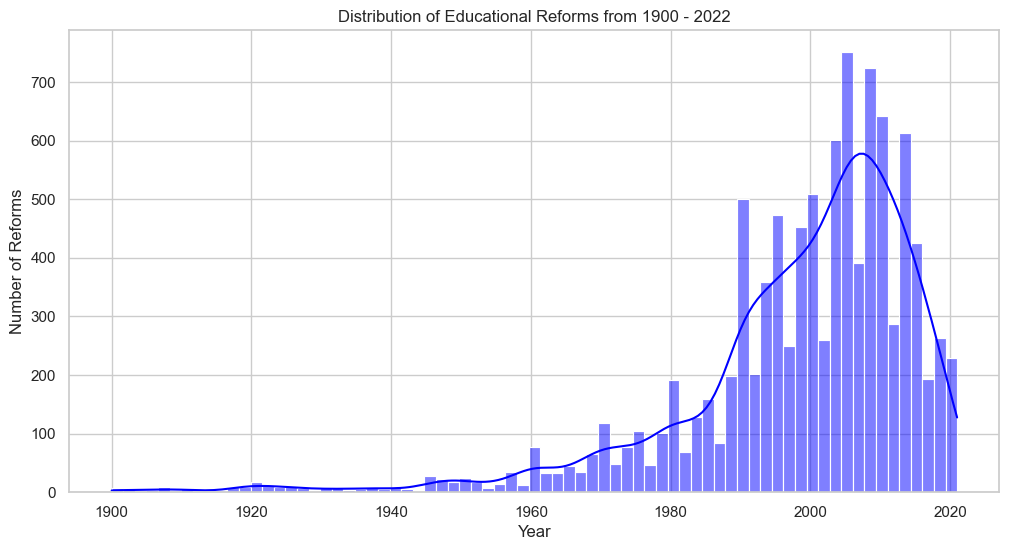

In [32]:
# Filter data to include only reforms from 1900 onwards
recent_reforms = werd_df[werd_df['year'] >= 1900]

plt.figure(figsize=(12, 6))
sns.histplot(recent_reforms['year'], kde=True, color='blue')
plt.title('Distribution of Educational Reforms from 1900 - 2022')
plt.xlabel('Year')
plt.ylabel('Number of Reforms')
plt.grid(True)
plt.show()

## Data Cleaning and Preprocessing

######

1. Each country's last PISA score will be used for prediction
2. Every policy that occurs up to 1 year before the last PISA score will not be used for prediction
3. A country with PISA score but no Educational Reform Policy will not be included in the model

### Feature Engineering

#### Find last participating year of each country

In [33]:
pisa_scores_only = pisa_df.drop(['no', 'country_name'], axis=1)

years = pisa_scores_only.columns.str.extract(r'(\d{4})_')[0].dropna().unique()

def get_last_year(row):
    valid_years = []
    for year in years:
        if pd.notnull(row.get(f'{year}_Science', None)) or \
           pd.notnull(row.get(f'{year}_Mathematics', None)) or \
           pd.notnull(row.get(f'{year}_Reading', None)):
            valid_years.append(year)
    if valid_years:
        return max(valid_years)
    return None

pisa_df['Last_PISA_Year'] = pisa_df.apply(get_last_year, axis=1)

last_pisa_year_counts = pisa_df['Last_PISA_Year'].value_counts().sort_index()

print("Number of countries with their last PISA test year:")
print(last_pisa_year_counts)

Number of countries with their last PISA test year:
Last_PISA_Year
2009     4
2012     1
2015     3
2018     6
2022    81
Name: count, dtype: int64


#### Calculate PISA Score of last participation

In [34]:
def calculate_mean_score(row, subjects=['Reading', 'Mathematics', 'Science']):
    last_year = row['Last_PISA_Year']
    scores = [row[f'{last_year}_{subject}'] for subject in subjects if f'{last_year}_{subject}' in row]
    return pd.Series(scores).mean()

pisa_df['Mean_Last_PISA_Score'] = pisa_df.apply(calculate_mean_score, axis=1)

In [35]:
pisa_df[['country_name','Mean_Last_PISA_Score']].head()

,country_name,Mean_Last_PISA_Score
0,Singapore,559.666667
1,Japan,533.000000
2,Macao (China),535.000000
3,Taiwan,533.000000
4,Korea,527.333333


#### Remove policies more than 1 year before last participation

In [36]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10955 entries, 0 to 10954
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reform_id                      10955 non-null  int64  
 1   country_code                   10880 non-null  object 
 2   country_name                   10955 non-null  object 
 3   reporting_entity               10955 non-null  object 
 4   year                           10237 non-null  float64
 5   reform_title                   10954 non-null  object 
 6   reform_description             10955 non-null  object 
 7   reform_description_translated  10955 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 684.8+ KB


In [37]:
werd_df = werd_df.merge(pisa_df[['country_name', 'Last_PISA_Year']], on='country_name', how='left')

werd_df['Last_PISA_Year'] = pd.to_numeric(werd_df['Last_PISA_Year'])
werd_df = werd_df[werd_df['year'] < werd_df['Last_PISA_Year']]

# Remove policies from the year of the last PISA test onwards
werd_df = werd_df[werd_df['year'] < ((werd_df['Last_PISA_Year'])-1)]

In [38]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6668 entries, 43 to 10722
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reform_id                      6668 non-null   int64  
 1   country_code                   6642 non-null   object 
 2   country_name                   6668 non-null   object 
 3   reporting_entity               6668 non-null   object 
 4   year                           6668 non-null   float64
 5   reform_title                   6667 non-null   object 
 6   reform_description             6668 non-null   object 
 7   reform_description_translated  6668 non-null   object 
 8   Last_PISA_Year                 6668 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 520.9+ KB


#### Output sample columns for thesis

In [41]:
sample_df_before_cleaning = werd_df.iloc[74:77, [2, 4, 7]]

In [42]:
sample_df_before_cleaning

,country_name,year,reform_description_translated
117,Albania,2012.0,Decentralization of the education system manag...
118,Albania,2016.0,"Building on the NES 2004-2015, the Ministry of..."
125,Algeria,1962.0,The National Institute for Educational Researc...


In [43]:
sample_df_before_cleaning.to_csv('../Output Figures/sample_df_before_cleaning.csv', index=False)

#### Combine remaining policies as one column

In [44]:
werd_df['combined_reform_description'] = werd_df.groupby('country_name')['reform_description_translated'].transform(lambda x: ' '.join(x))

# Drop duplicates after combining the texts
werd_df = werd_df[['country_name', 'combined_reform_description']].drop_duplicates()

In [45]:
werd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 43 to 10600
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_name                 91 non-null     object
 1   combined_reform_description  91 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [46]:
werd_df.head()

,country_name,combined_reform_description
43,Albania,Although compulsory education was established ...
125,Algeria,The National Institute for Educational Researc...
249,Argentina,Probably the most important change that took p...
379,Australia,State governments have their own Education Act...
468,Austria,"School Reform under Empress Maria Theresa, est..."


## Text Preprocessing

#### Removing Stopwords

In [49]:
def normalize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

werd_df['reform_description_clean'] = werd_df['combined_reform_description'].apply(normalize_text)

#### Sample output for thesis

In [50]:
sample_df_after_combining = werd_df.iloc[0:2, [0, 2]]

In [52]:
sample_df_after_combining

,country_name,reform_description_clean
43,Albania,although compulsory education established law ...
125,Algeria,national institute educational research create...


In [51]:
sample_df_after_combining.to_csv('../Output Figures/sample_df_after_combining.csv', index=False)

## Combining PISA and WERD DF

In [53]:
print(werd_df.info())
print(pisa_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 43 to 10600
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_name                 91 non-null     object
 1   combined_reform_description  91 non-null     object
 2   reform_description_clean     91 non-null     object
dtypes: object(3)
memory usage: 2.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no                    95 non-null     int64  
 1   country_name          95 non-null     object 
 2   2000_Reading          39 non-null     float64
 3   2000_Mathematics      40 non-null     float64
 4   2000_Science          41 non-null     float64
 5   2003_Reading          38 non-null     float64
 6   2003_Mathematics      39 non-null     float64
 7   20

#### Find countries in PISA but not in WERD and vice versa

In [54]:
unique_werd_countries = set(werd_df['country_name'].unique())
unique_pisa_countries = set(pisa_df['country_name'].unique())

# Find countries that appear in one dataframe but not the other
werd_not_in_pisa = unique_werd_countries - unique_pisa_countries
pisa_not_in_werd = unique_pisa_countries - unique_werd_countries

print("Countries in WERD not in PISA:", werd_not_in_pisa)
print("Countries in PISA not in WERD:", pisa_not_in_werd)

Countries in WERD not in PISA: set()
Countries in PISA not in WERD: {'Taiwan', 'Macao (China)', 'Hong Kong', 'Liechtenstein'}


#### Merge DF

In [55]:
final_df = pd.merge(werd_df[['country_name', 'reform_description_clean']],
                    pisa_df[['country_name', 'Mean_Last_PISA_Score']],
                    on='country_name', how='outer')

print("Preview of the merged DataFrame:")
print(final_df.head())

Preview of the merged DataFrame:
  country_name                           reform_description_clean  \
0      Albania  although compulsory education established law ...   
1      Algeria  national institute educational research create...   
2    Argentina  probably important change took place recogniti...   
3    Australia  state government education act make provision ...   
4      Austria  school reform empress maria theresa establishm...   

   Mean_Last_PISA_Score  
0            367.333333  
1            362.000000  
2            395.000000  
3            497.333333  
4            486.000000  


In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              95 non-null     object 
 1   reform_description_clean  91 non-null     object 
 2   Mean_Last_PISA_Score      95 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.4+ KB


#### Four countries will be dropped because there are no reform descriptions for them: Hong Kong, Taiwan, Macao, and Liechtenstein

In [57]:
final_df.dropna(subset=['reform_description_clean', 'Mean_Last_PISA_Score'], inplace=True)

print("Preview of the cleaned DataFrame:")
print(final_df.head())

Preview of the cleaned DataFrame:
  country_name                           reform_description_clean  \
0      Albania  although compulsory education established law ...   
1      Algeria  national institute educational research create...   
2    Argentina  probably important change took place recogniti...   
3    Australia  state government education act make provision ...   
4      Austria  school reform empress maria theresa establishm...   

   Mean_Last_PISA_Score  
0            367.333333  
1            362.000000  
2            395.000000  
3            497.333333  
4            486.000000  


In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              91 non-null     object 
 1   reform_description_clean  91 non-null     object 
 2   Mean_Last_PISA_Score      91 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


### EDA after combining

#### Statistics of Mean PISA Score

In [59]:
print(final_df['Mean_Last_PISA_Score'].describe())

# Basic info and summary of the dataframe
final_df.info()
final_df.describe()

count     91.000000
mean     433.816850
std       56.680832
min      325.000000
25%      390.666667
50%      428.000000
75%      480.833333
max      578.666667
Name: Mean_Last_PISA_Score, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              91 non-null     object 
 1   reform_description_clean  91 non-null     object 
 2   Mean_Last_PISA_Score      91 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


,Mean_Last_PISA_Score
count,91.000000
mean,433.816850
std,56.680832
min,325.000000
25%,390.666667
50%,428.000000
75%,480.833333
max,578.666667


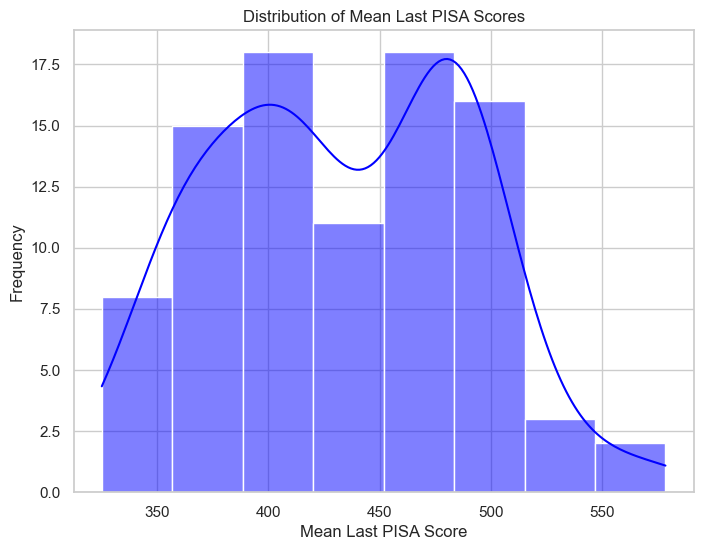

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(final_df['Mean_Last_PISA_Score'], kde=True, color='blue')
plt.title('Distribution of Mean Last PISA Scores')
plt.xlabel('Mean Last PISA Score')
plt.ylabel('Frequency')
plt.show()

#### Checkpoint (save as csv)

In [ ]:
final_df.to_csv('../Data/final_pisa_werd_merged.csv', index=False)